Here, we import the necessary libraries for data manipulation, visualization, and machine learning.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

We download the California Housing Prices dataset from Kaggle using `kagglehub`.

In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


We load the downloaded CSV file into a pandas DataFrame and display the first few rows to inspect the data.

In [36]:
# Assuming the CSV file is named 'housing.csv' within the downloaded path
csv_path = f"{path}/housing.csv"
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We check the information about the DataFrame, including column names, non-null counts, and data types.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We drop rows with missing values using `dropna()` to ensure data integrity for further analysis.

In [38]:
df.dropna(inplace=True)

We display the information about the DataFrame again to confirm that null values have been removed.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


We generate descriptive statistics for the numerical columns in the DataFrame to understand the distribution and summary of the data.

In [40]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We examine the value counts of the 'ocean_proximity' column to understand the distribution of different categories.

In [41]:
df['ocean_proximity'].value_counts() # one-hot encoding

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


We generate histograms for the numerical columns in the training data to visualize their distributions.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

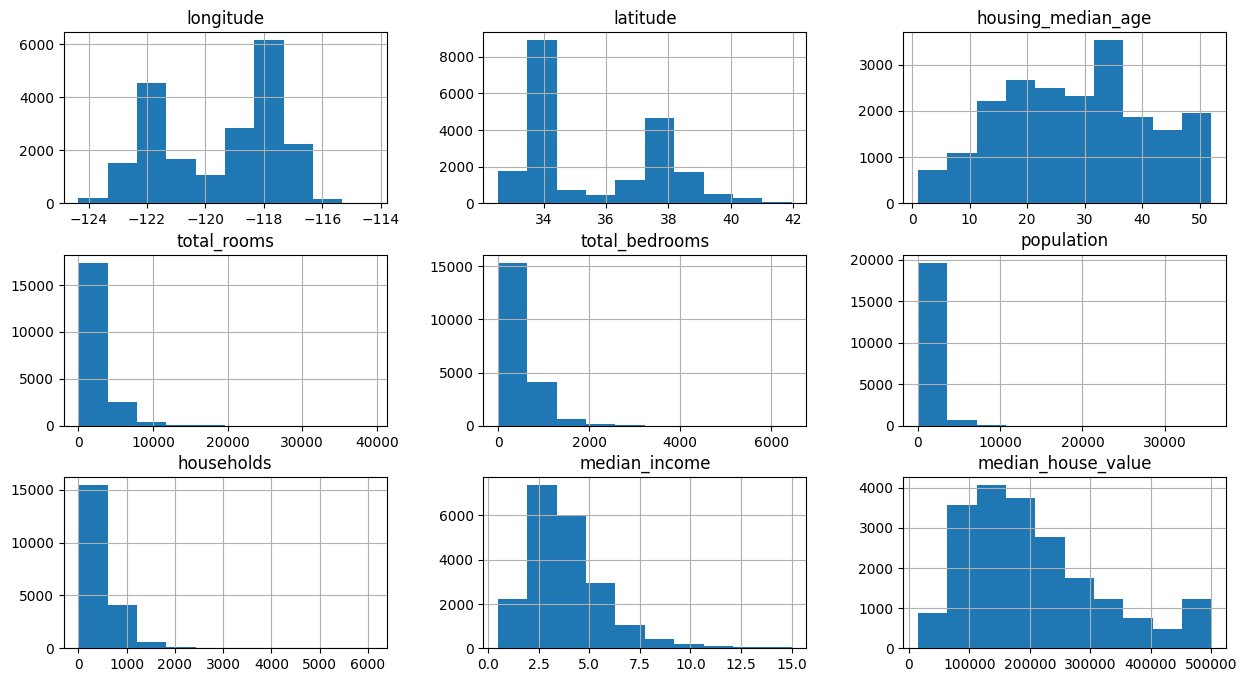

In [42]:
df.hist(figsize=(15,8))

We calculate and display a heatmap of the correlation matrix for the numerical features in the training data, excluding 'ocean_proximity', to understand the relationships between variables.

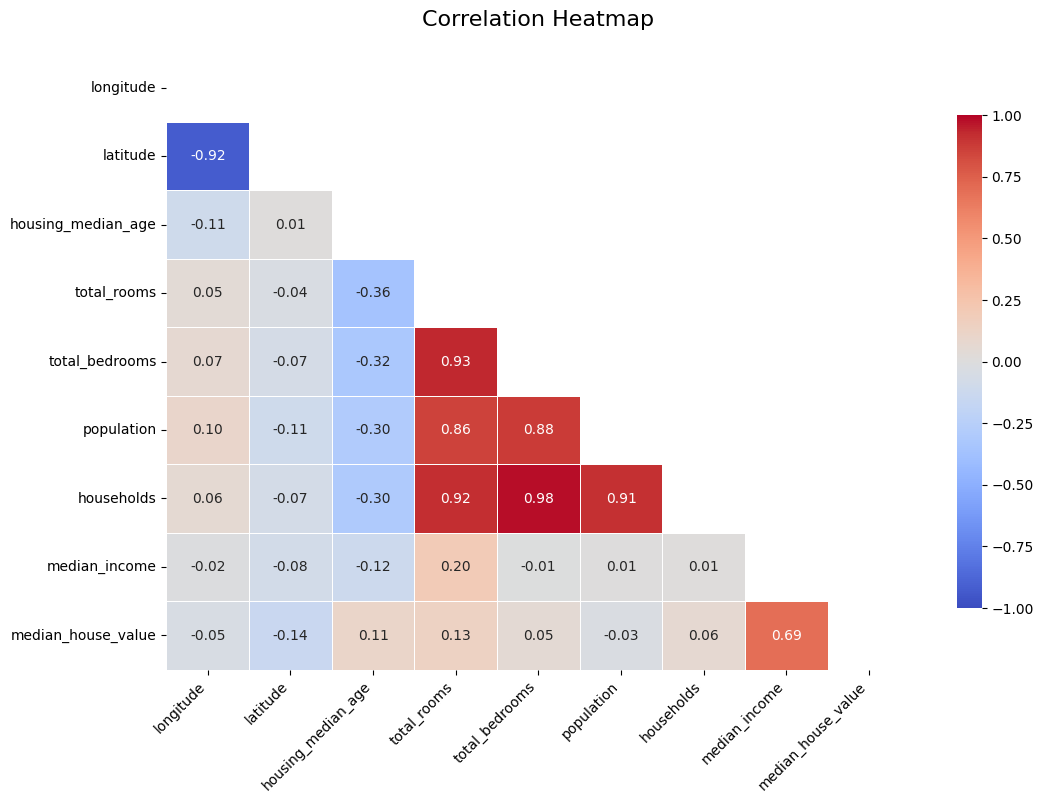

In [43]:
# حساب مصفوفة الارتباط
corr = df.drop(['ocean_proximity'], axis=1).corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))  # لإخفاء المثلث العلوي

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    mask=mask,
    linewidths=0.5,   # مسافات بين الخلايا
    cbar_kws={"shrink": 0.8}  # شريط الألوان أصغر
)

plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

We create a scatter plot to visualize the relationship between 'median_income' and 'median_house_value' and calculate and display the Pearson correlation coefficient between these two variables.

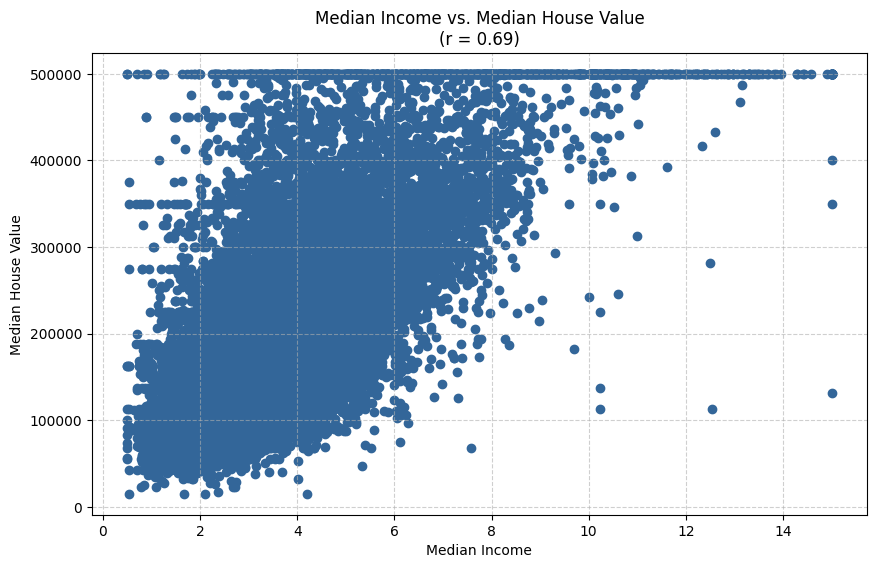

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming 'df' is a pandas DataFrame with 'median_income' and 'median_house_value' columns
# Calculate the Pearson correlation coefficient
r_value, _ = pearsonr(df['median_income'], df['median_house_value'])

# Create and enhance the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['median_income'], df['median_house_value'], color='#336699')

# Add title with the calculated r-value
ax.set_title(f'Median Income vs. Median House Value\n(r = {r_value:.2f})')
ax.set_xlabel('Median Income')
ax.set_ylabel('Median House Value')
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

We calculate the average median house value for each housing median age and plot it to visualize the trend.

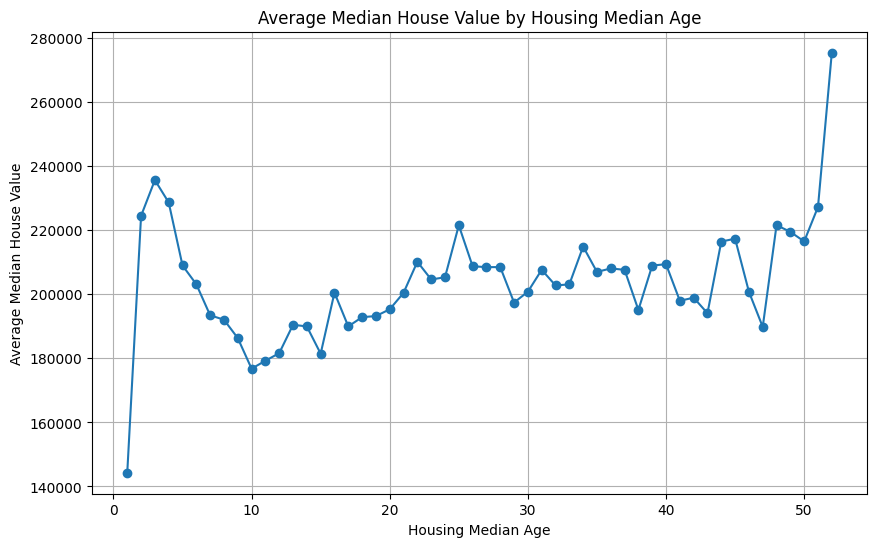

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
# This is useful for seeing the average trend
avg_house_value_by_age = df.groupby('housing_median_age')['median_house_value'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_house_value_by_age.index, avg_house_value_by_age.values, marker='o')
plt.title('Average Median House Value by Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Average Median House Value')
plt.grid(True)
plt.show()

Based on the plot of Average Median House Value by Housing Median Age, it appears that houses with a very young age (between 1 and 5 years) have an approximate median house value of around $230,000. Additionally, there is a striking trend that houses older than 50 years are getting much higher values, reaching around $270,000, which could be because they are now considered heritage properties.

In [46]:
def log(df,column_name):
  df[column_name]=np.log(df[column_name]+1)
  return df

We apply a logarithmic transformation to several numerical columns ('total_rooms', 'total_bedrooms', 'population', 'households') to address skewed distributions.

In [47]:
for i in ['total_rooms','total_bedrooms','population','households']:
  df=log(df,i)

We generate histograms again for the numerical columns after the logarithmic transformation to visualize the effect on their distributions.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

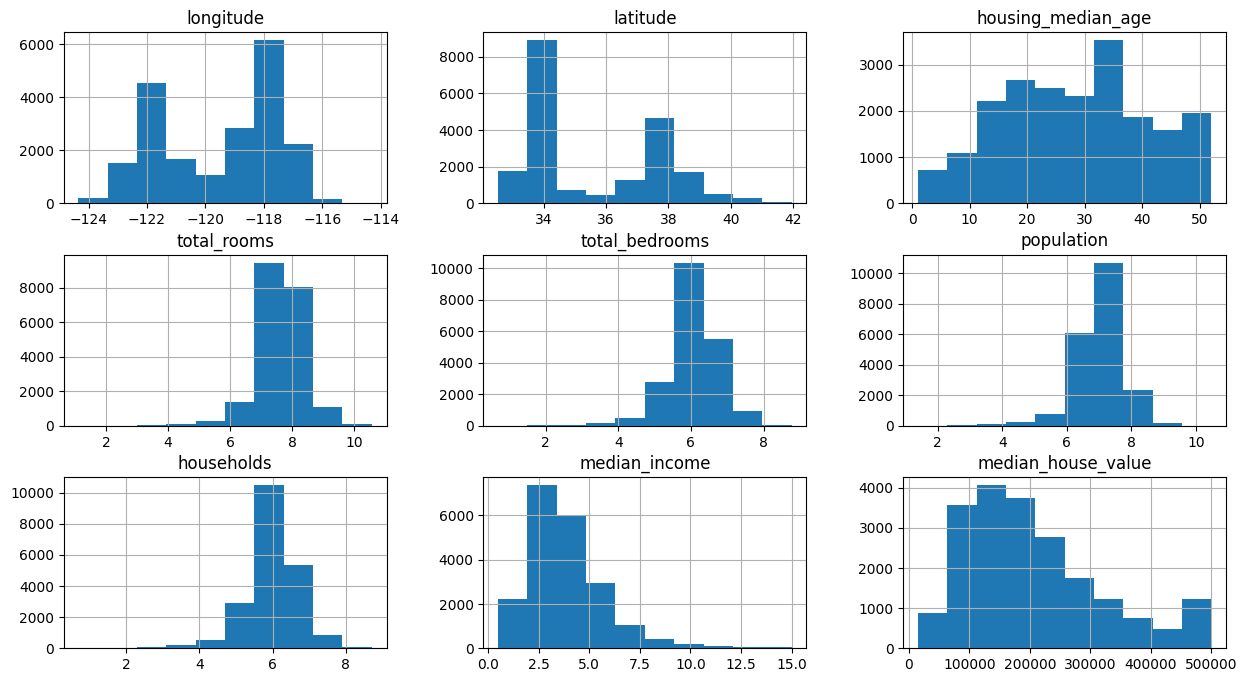

In [48]:
df.hist(figsize=(15,8))

We examine the value counts of the 'ocean_proximity' column again to confirm the categories.

In [49]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


We perform one-hot encoding on the 'ocean_proximity' categorical column to convert it into numerical features.

In [50]:
df=pd.get_dummies(df,columns=['ocean_proximity'],dtype=int)

We display the DataFrame after one-hot encoding to see the new columns.

In [51]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


We calculate and display a heatmap of the correlation matrix for all features, including the one-hot encoded 'ocean_proximity' columns, to understand the relationships between all variables.

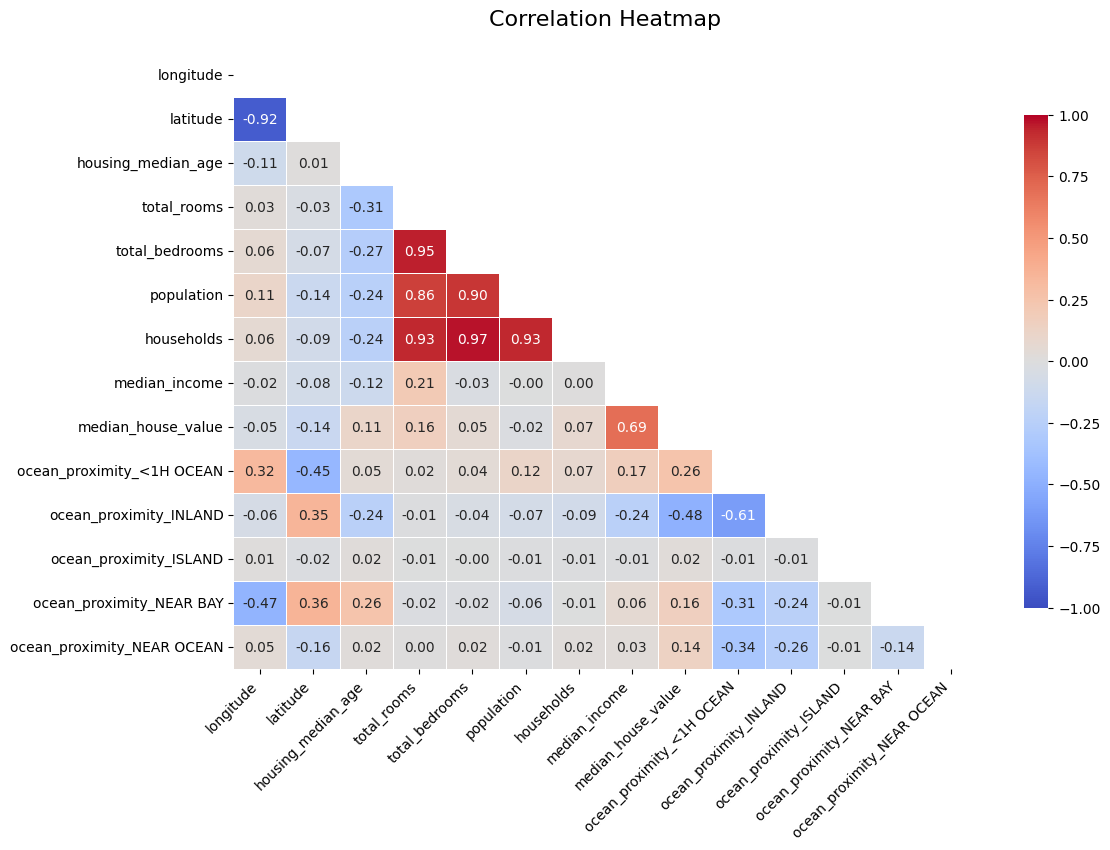

In [52]:
# حساب مصفوفة الارتباط
corr = df.corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))  # لإخفاء المثلث العلوي

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    mask=mask,
    linewidths=0.5,   # مسافات بين الخلايا
    cbar_kws={"shrink": 0.8}  # شريط الألوان أصغر
)

plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

We create a scatter plot to visualize the geographical distribution of houses and color-code them by their median house value.

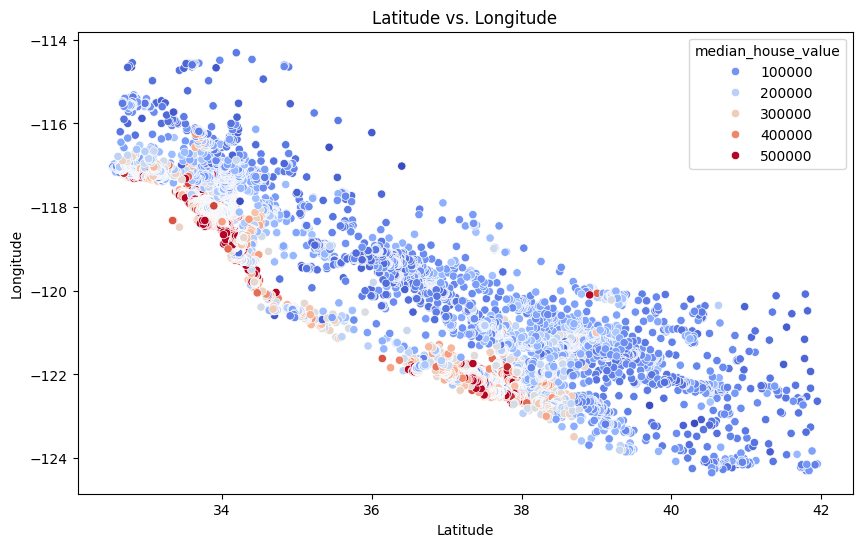

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x=df['latitude'],y=df['longitude'],hue=df['median_house_value'],palette='coolwarm')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude vs. Longitude')
plt.show()

We create new features by calculating the ratio of bedrooms per room and households per room.

In [54]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['households_per_room'] = df['households'] / df['total_rooms']

We calculate and display a heatmap of the correlation matrix including the newly created features to see their relationships with other variables and the target.

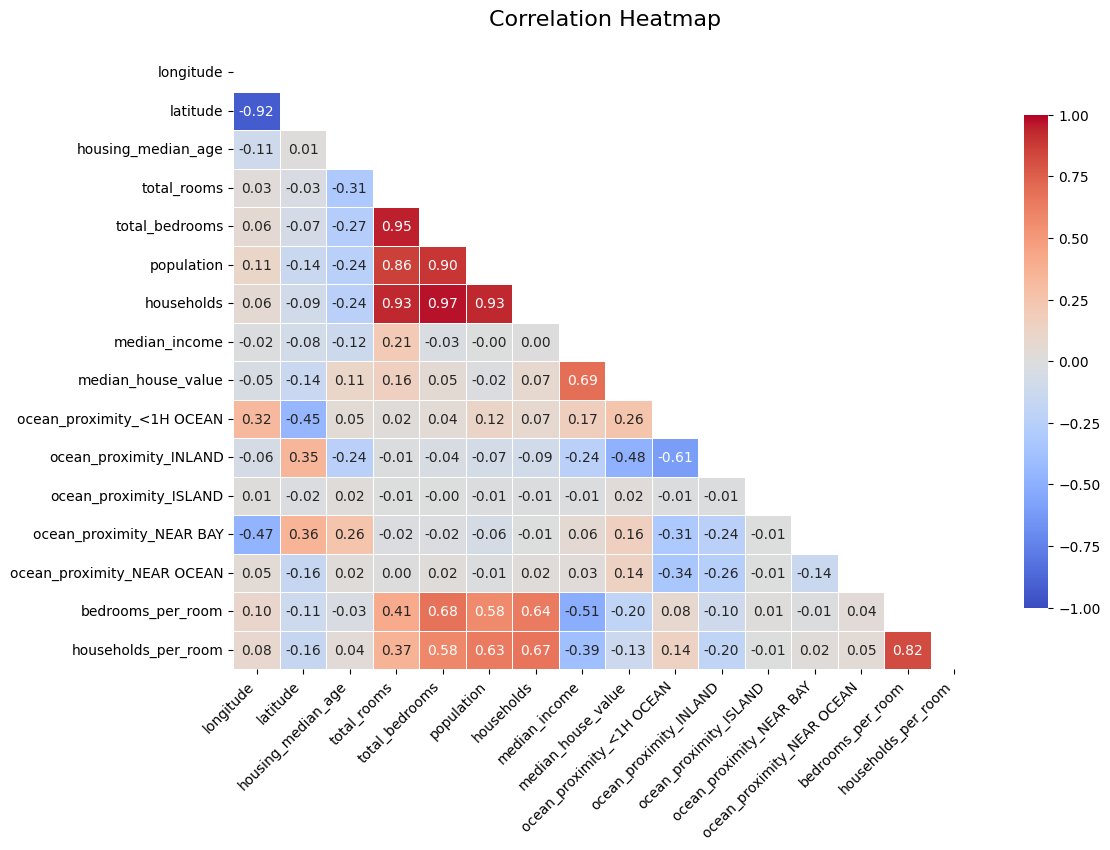

In [55]:
# حساب مصفوفة الارتباط
corr = df.corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))  # لإخفاء المثلث العلوي

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    mask=mask,
    linewidths=0.5,   # مسافات بين الخلايا
    cbar_kws={"shrink": 0.8}  # شريط الألوان أصغر
)

plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

We display the DataFrame with the new features added.

In [56]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedrooms_per_room,households_per_room
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,0.714370
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,0.793643
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,0.710646
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,0.754280
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,0.751941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0,0.798973,0.782148
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0,0.766205,0.724614
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0,0.801228,0.786572
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0,0.799078,0.778063


We separate the features (X) and the target variable (y), which is 'median_house_value'.

In [67]:
X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

We split the data into training, validation, and testing sets using `train_test_split` to prepare for model training, hyperparameter tuning, and final evaluation.

In [68]:
X_train ,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.3,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

We scale the features using `StandardScaler` to standardize the data before training the model.

In [69]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

We train Linear Regression models with different polynomial degrees and evaluate their performance on the validation set using R-squared and Mean Squared Error.

Degree 1: R² = 0.6710
Degree 2: R² = 0.7281
Degree 3: R² = 0.0888


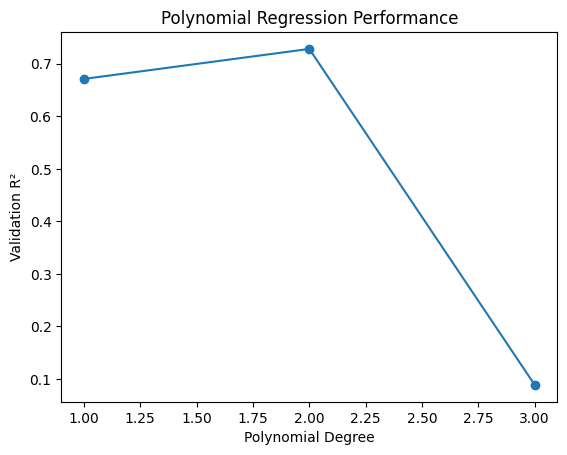

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

degrees = range(1, 4)
R2_scores = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_train_poly, y_train)

    y_val_pred = lin_reg_poly.predict(X_val_poly)
    r2 = r2_score(y_val, y_val_pred)
    mse = mean_squared_error(y_test, y_val_pred)
    R2_scores.append(r2)
    print(f"Degree {d}: R² = {r2:.4f}")
# رسم منحنى الأداء
plt.plot(degrees, R2_scores, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Validation R²")
plt.title("Polynomial Regression Performance")
plt.show()

Data evaluate

In [82]:
model=LinearRegression()
model.fit(X_train,y_train)
yhat=model.predict(X_test)
r2=r2_score(y_test,yhat)
print(f"R²: {r2:.4f}")

R²: 0.6795


In [83]:
y_hat=model.predict(X_val)
r2 = r2_score(y_val, y_hat)

print(f"R²: {r2:.4f}")

R²: 0.6710


In [84]:
yhat=model.predict(X_train)
r2=r2_score(y_train,yhat)
print(f"R²: {r2:.4f}")

R²: 0.6691


In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)

print("R²:", r2_score(y_val, y_val_pred))

R²: 0.8190517689586738
